<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- 다양한 알고리즘으로 모델을 만들고 성능을 비교합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/titanic.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [3]:
# 데이터 살펴보기
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 기초통계정보 확인
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


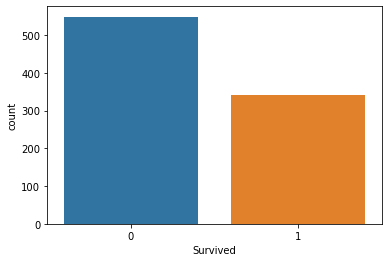

In [5]:
import seaborn as sns
sns.countplot(data['Survived'])
plt.show()

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) Title 변수 추가**

In [6]:
# 호칭 추출
data['Title'] = data['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [7]:
# 대표 호칭 이외는 Others로 변경
main_tit_list = ['Mr', 'Miss', 'Mrs']
data.loc[data['Title'].isin(main_tit_list)==False, ['Title']] = 'Others'

**2) 결측치 처리**

In [8]:
# Age 중앙값으로 채우기
data['Age'].fillna(data.groupby('Title')['Age'].transform('median'), inplace=True)

In [9]:
# Embarked 최빈값으로 채우기
data['Embarked'] = data['Embarked'].fillna('S')

**3) AgeGroup 변수 추가**

In [10]:
# 변수 추가
bins = [0, 16, 25, 35, 60, 100]
data['AgeGroup'] = pd.cut(data['Age'], 
                          bins=bins, 
                          labels=['0_16', '17_25', '26_35', '36_60', '61_100'])

**4) 불필요한 변수 제거**

In [11]:
# 불필요한 열 제거
drop_cols = ['PassengerId', 'Name', 'Age', 'Ticket', 'Cabin']
data.drop(drop_cols, axis=1, inplace=True)

**5) 가변수화**

In [12]:
# 가변수화
dummy_vars = ['Title', 'AgeGroup', 'Pclass', 'Sex', 'Embarked']

for v in dummy_vars:
    dummies = pd.get_dummies(data[v], prefix=v, drop_first=True)
    data = pd.concat([data, dummies], axis=1)
    data.drop(v, axis=1, inplace=True)

**6) x, y 분리**

In [13]:
# target 확인
target = 'Survived'

# 데이터 분리
x = data.drop(target, axis=1)
y = data[target] 

**7) 정규화**

In [14]:
# 정규화
x = (x - x.min()) / (x.max() - x.min())

**8) 학습용, 평가용 데이터 분리**

In [15]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.
- 5가지 알고리즘으로 모델을 만들고 성능을 확입니다.
- 성능 평가는 confusion_matrix, classification_report를 사용합니다.
- 각 알고리즘별로 요구되는 내용을 숙지하면서 모델링을 진행합니다.

## 4.1.KNN

- KNN 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 n_neighbors=5를 지정합니다.

In [16]:
# 불러오기

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
# 선언하기

model = KNeighborsClassifier(n_neighbors=5)

In [18]:
# 학습하기

model.fit(x_train, y_train)

KNeighborsClassifier()

In [19]:
# 예측하기

y_pred = model.predict(x_test)

In [20]:
# 평가하기

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[152  16]
 [ 34  66]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       168
           1       0.80      0.66      0.73       100

    accuracy                           0.81       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.81      0.81      0.81       268



## 4.2.Decision Tree

- Decision Tree 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 max_depth=10, random_state=2022을 지정합니다.

In [21]:
# 불러오기

from sklearn.tree import DecisionTreeClassifier

In [22]:
# 선언하기

model = DecisionTreeClassifier(max_depth=10, random_state=2022)

In [23]:
# 학습하기

model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=2022)

In [24]:
# 예측하기

y_pred = model.predict(x_test)

In [25]:
# 평가하기

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[150  18]
 [ 37  63]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.85       168
           1       0.78      0.63      0.70       100

    accuracy                           0.79       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.79      0.79      0.79       268



## 4.3.Random Forest

- Random Forest 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 max_depth=10, random_state=2022을 지정합니다.

In [26]:
# 불러오기

from sklearn.ensemble import RandomForestClassifier

In [27]:
# 선언하기

model = RandomForestClassifier(max_depth=10, random_state=2022)

In [28]:
# 학습하기

model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=2022)

In [29]:
# 예측하기

y_pred = model.predict(x_test)

In [30]:
# 평가하기

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[153  15]
 [ 33  67]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       168
           1       0.82      0.67      0.74       100

    accuracy                           0.82       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.82      0.82      0.82       268



## 4.4.XGBoost

- XGBoost 알고리즘으로 모델링하고 성능을 확인합니다.
- 모델 선언시 max_depth=10, random_state=2022를 지정합니다.

In [31]:
# 불러오기

from xgboost import XGBClassifier

In [32]:
# 선언하기

modell = XGBClassifier(max_depth=10, random_state=2022)

In [33]:
# 학습하기

model.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=2022)

In [34]:
# 예측하기

y_pred = model.predict(x_test)

In [35]:
# 평가하기

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[153  15]
 [ 33  67]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       168
           1       0.82      0.67      0.74       100

    accuracy                           0.82       268
   macro avg       0.82      0.79      0.80       268
weighted avg       0.82      0.82      0.82       268



## 튜닝 (옵션)

In [36]:
# 불러오기
from sklearn.model_selection import GridSearchCV

# 변수 선언
param = {'max_depth':range(1,16), 
         'random_state':range(10, 151, 10)}

# 선언하기
model_rfc = RandomForestClassifier(random_state=2022)
model = GridSearchCV(model_rfc, 
                    param, 
                    cv=10, 
                    n_jobs=-1)

# 학습하기
model.fit(x_train, y_train)

# 예측하기
y_pred = model.predict(x_test)

# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[154  14]
 [ 33  67]]
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       168
           1       0.83      0.67      0.74       100

    accuracy                           0.82       268
   macro avg       0.83      0.79      0.80       268
weighted avg       0.82      0.82      0.82       268



In [37]:
print(model.best_params_)
print(model.best_score_)


{'max_depth': 9, 'random_state': 30}
0.8364823348694317


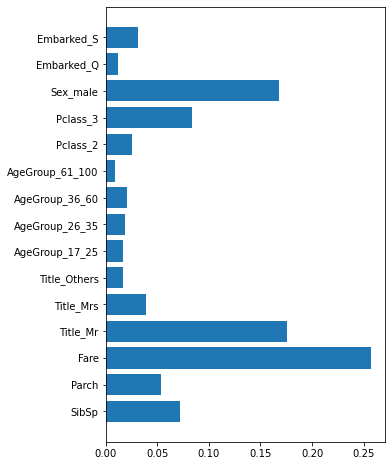

In [38]:
# 변수 중요도
plt.figure(figsize=(5,8))
plt.barh(list(x), model.best_estimator_.feature_importances_)
plt.show()